
## Data Preprocessing and Exploratory Data Analysis


In [1]:
#Initialize environment - Load Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import warnings
import random

In [3]:
sns.set_style('whitegrid')
warnings.simplefilter('ignore')

In [4]:
dtype_dic= {'Zipcode': str,
            'StateFIPS': str,
            'CountyFIPS' : 'str'}

# Data Preprocessing

# Read QDOBA Location Data

In [5]:
#df = pd.read_csv('QDOBANJLocations.csv', dtype=dtype_dic)
#df = pd.read_csv('QDOBANJ _PossibleNewLoc.csv', dtype=dtype_dic)

df = pd.read_csv('QDOBANJLocations-All34.csv', dtype=dtype_dic)

In [6]:
# Preview Input Data
df.head()

,Location,Address,City,State,Zipcode,Phone,OnlineOrderingService,CateringService,DineInService,TakeOutService,BreakFastService,DeliveryService,Competitors
0,Halsey,64 Halsey St,Newark,NJ,07102,(973) 353-0213,Online Ordering,Catering,Dine-In,Take Out,NaN,NaN,2
1,Newark Airport,10 Toler Place,Newark,NJ,07114,(973) 242-0916,NaN,NaN,Dine-In,NaN,Breakfast,NaN,3
2,Union,2268 US Highway 22 E,Union,NJ,07083,(908) 686-6043,Online Ordering,Catering,Dine-In,Take Out,NaN,NaN,1
3,Bayonne,905 Bayonne Crossing Way,Bayonne,NJ,07002,(201) 339-1463,Online Ordering,Catering,Dine-In,Take Out,NaN,NaN,3
4,Newport Centre Mall,30 Mall Dr West,Jersey City,NJ,07310,(201) 222-6095,Online Ordering,Catering,Dine-In,Take Out,NaN,NaN,2


# Read Demograhic Data

In [7]:
#df1 = pd.read_csv('QDOBADemoAll-1.csv', dtype=dtype_dic)
#df1 = pd.read_csv('QDOBADemoAll-TestDataSet.csv', dtype=dtype_dic)

df1 = pd.read_csv('QDOBADemoAll-34Locations.csv', dtype=dtype_dic)

In [8]:
# Preview Input Data
df1.head()

,Zipcode,City,County,State,Latitude,Longitude,CountyLat,CountyLong,StateFIPS,CountyFIPS,...,LessHS,Population,MedianIncome,DiversityIndex,TotalHU,OwnerHU,RenterHU,VacantHU,TotalHousehold,HouseHoldSize
0,07102,Newark,ESSEX,NJ,40.735502,-74.172845,40.787216,-74.246136,34,013,...,3363,11883,26135,79,5356,427,4291,638,4718,2
1,07114,Newark,ESSEX,NJ,40.697442,-74.166362,40.787216,-74.246136,34,013,...,4910,15737,23615,82,5394,547,3575,1272,4122,3
2,07083,Union,UNION,NJ,40.693475,-74.267224,40.659871,-74.308696,34,039,...,6281,55095,88477,77,19393,13716,5029,648,18745,3
3,07002,Bayonne,HUDSON,NJ,40.670780,-74.106366,40.731384,-74.078627,34,017,...,8442,66469,61323,74,28574,9580,16660,2334,26240,3
4,07310,Jersey City,HUDSON,NJ,40.729066,-74.036211,40.731384,-74.078627,34,017,...,564,16114,151876,59,8494,1234,5864,1396,7098,2


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 30 columns):
Zipcode                  34 non-null object
City                     34 non-null object
County                   34 non-null object
State                    34 non-null object
Latitude                 34 non-null float64
Longitude                34 non-null float64
CountyLat                34 non-null float64
CountyLong               34 non-null float64
StateFIPS                34 non-null object
CountyFIPS               34 non-null object
MedianAge                34 non-null int64
MaleMedianAge            34 non-null int64
FemaleMedianAge          34 non-null int64
UndergraduateDegrees	    34 non-null float64
Undergraduate            34 non-null int64
GraduateDegrees	         34 non-null float64
Graduate                 34 non-null int64
HighSchoolGraduate	      34 non-null float64
HSGrad                   34 non-null int64
HSorless	                34 non-null float64
LessHS         

# Transform categorical values

# Transform using qcut

In [10]:
# Bin Diversity Index
labels_bin = ["low","medium","high", "veryhigh","upper"]

df1["Diversity"] = pd.qcut(df1["DiversityIndex"],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=labels_bin)

df_diversity = pd.get_dummies(df1['Diversity'], prefix = 'Diversity', drop_first=True)

In [11]:
# Bin Median Income
labels_bin = ["low","medium","high", "veryhigh","upper"]
df1["MedianInc"] = pd.qcut(df1["MedianIncome"],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=labels_bin)

df_medinc = pd.get_dummies(df1['MedianInc'], prefix = 'MedianInc', drop_first=True)

In [12]:
# Bin Population
labels_bin = ["low","medium","high", "veryhigh","upper"]
df1["Pop"] = pd.qcut(df1["Population"],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=labels_bin)

df_pop = pd.get_dummies(df1['Pop'], prefix = 'Pop', drop_first=True)

In [10]:
# Bin Median Age
labels_bin = ["under35","under40","under42", "above41"]
df1["MedianAg"] = pd.qcut(df1["MedianAge"],
                              q=[0, .2, .4, .6, 1],
                              labels=labels_bin)

df_medage= pd.get_dummies(df1['MedianAg'], prefix = 'MedianAg', drop_first=True)

In [14]:
# Bin Total Households
labels_bin = ["low","medium","high", "veryhigh","upper"]
df1["TotHouse"] = pd.qcut(df1["TotalHousehold"],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=labels_bin)

df_tothouse = pd.get_dummies(df1['TotHouse'], prefix = 'TotHouse', drop_first=True)

In [15]:
# Bin Total Household Units
labels_bin = ["low","medium","high", "veryhigh","upper"]
df1["TotHunits"] = pd.qcut(df1["TotalHU"],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=labels_bin)

df_tothunits = pd.get_dummies(df1['TotHunits'], prefix = 'TotHunits', drop_first=True)

In [16]:
results, bin_edges = pd.qcut(df1['DiversityIndex'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=labels_bin,
                            retbins=True)

bin_edges

array([25. , 44.8, 55.4, 60. , 74.4, 84. ])

In [17]:
results, bin_edges = pd.qcut(df1['MedianIncome'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=labels_bin,
                            retbins=True)

bin_edges

array([ 23615. ,  77735. ,  89124.4, 106117.8, 122450.8, 200001. ])

In [18]:
results, bin_edges = pd.qcut(df1['Population'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=labels_bin,
                            retbins=True)

bin_edges

array([ 3499. , 14903.8, 23237. , 31590.6, 46763.4, 66469. ])

In [11]:
results, bin_edges = pd.qcut(df1['MedianAge'],
                            q=[0, .2, .4, .6, 1],
                            labels=labels_bin,
                            retbins=True)

bin_edges

array([24., 34., 40., 41., 48.])

In [20]:
results, bin_edges = pd.qcut(df1['TotalHousehold'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=labels_bin,
                            retbins=True)

bin_edges

array([ 1564. ,  4785.8,  8425. , 11859.2, 17611.8, 27352. ])

In [21]:
results, bin_edges = pd.qcut(df1['TotalHU'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=labels_bin,
                            retbins=True)

bin_edges

array([ 1586. ,  5384.8,  9129.6, 12841.4, 18842.8, 29371. ])

In [22]:
df1.head()

,Zipcode,City,County,State,Latitude,Longitude,CountyLat,CountyLong,StateFIPS,CountyFIPS,...,RenterHU,VacantHU,TotalHousehold,HouseHoldSize,Diversity,MedianInc,Pop,MedianAg,TotHouse,TotHunits
0,07102,Newark,ESSEX,NJ,40.735502,-74.172845,40.787216,-74.246136,34,013,...,4291,638,4718,2,upper,low,low,under35,low,low
1,07114,Newark,ESSEX,NJ,40.697442,-74.166362,40.787216,-74.246136,34,013,...,3575,1272,4122,3,upper,low,medium,under35,low,medium
2,07083,Union,UNION,NJ,40.693475,-74.267224,40.659871,-74.308696,34,039,...,5029,648,18745,3,upper,medium,upper,under40,upper,upper
3,07002,Bayonne,HUDSON,NJ,40.670780,-74.106366,40.731384,-74.078627,34,017,...,16660,2334,26240,3,veryhigh,low,upper,under40,upper,upper
4,07310,Jersey City,HUDSON,NJ,40.729066,-74.036211,40.731384,-74.078627,34,017,...,5864,1396,7098,2,high,upper,medium,under35,medium,medium


In [23]:
df1.describe(include='category')

,Diversity,MedianInc,Pop,MedianAg,TotHouse,TotHunits
count,34,34,34,34,34,34
unique,5,5,5,4,5,5
top,upper,upper,upper,above41,upper,upper
freq,7,7,7,12,7,7


In [24]:
df1 = pd.concat([df1, df_diversity, df_medinc,df_pop, df_medage, df_tothouse, df_tothunits], axis=1)

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 59 columns):
Zipcode                  34 non-null object
City                     34 non-null object
County                   34 non-null object
State                    34 non-null object
Latitude                 34 non-null float64
Longitude                34 non-null float64
CountyLat                34 non-null float64
CountyLong               34 non-null float64
StateFIPS                34 non-null object
CountyFIPS               34 non-null object
MedianAge                34 non-null int64
MaleMedianAge            34 non-null int64
FemaleMedianAge          34 non-null int64
UndergraduateDegrees	    34 non-null float64
Undergraduate            34 non-null int64
GraduateDegrees	         34 non-null float64
Graduate                 34 non-null int64
HighSchoolGraduate	      34 non-null float64
HSGrad                   34 non-null int64
HSorless	                34 non-null float64
LessHS         

In [26]:
df1.head()

,Zipcode,City,County,State,Latitude,Longitude,CountyLat,CountyLong,StateFIPS,CountyFIPS,...,MedianAg_under42,MedianAg_above41,TotHouse_medium,TotHouse_high,TotHouse_veryhigh,TotHouse_upper,TotHunits_medium,TotHunits_high,TotHunits_veryhigh,TotHunits_upper
0,07102,Newark,ESSEX,NJ,40.735502,-74.172845,40.787216,-74.246136,34,013,...,0,0,0,0,0,0,0,0,0,0
1,07114,Newark,ESSEX,NJ,40.697442,-74.166362,40.787216,-74.246136,34,013,...,0,0,0,0,0,0,1,0,0,0
2,07083,Union,UNION,NJ,40.693475,-74.267224,40.659871,-74.308696,34,039,...,0,0,0,0,0,1,0,0,0,1
3,07002,Bayonne,HUDSON,NJ,40.670780,-74.106366,40.731384,-74.078627,34,017,...,0,0,0,0,0,1,0,0,0,1
4,07310,Jersey City,HUDSON,NJ,40.729066,-74.036211,40.731384,-74.078627,34,017,...,0,0,1,0,0,0,1,0,0,0


# Prepare Mean and Standard Deviation to be used to Generate Random StoreSales from a Normal Distribution

In [27]:
# Set likely StoreSales Range - Low and High
low_range = 450000
high_range = 750000

# 95% Standard Deviation
# 95% of a sample is within two standard deviations on 
# each side of the mean. (This is a total of four standard deviations, of course.) 
# Divide the range by four to create the approximate standard deviation.

standard_dev = 4

# Calculate Mean for all Qdoba Stores from:
# 2017 Gross Sales = $436,558,000
# Number of Qdoba Stores = 723
# Number of NJ Qdoba Stores 24
# NJ makes up .03 percent of Qdoba Stores 24/723

qdoba_sales = 436558000
qdoba_stores = 723
qdobanj_stores = 24

nj_pct = qdobanj_stores / qdoba_stores
nj_sales = qdoba_sales * nj_pct

nj_mean = nj_sales / qdobanj_stores

nj_std = (high_range - low_range) / standard_dev


In [28]:
np.random.normal(nj_mean, nj_std)

543330.792873334

In [29]:
# Combine State and County Code
df1['FIPS'] = df1['StateFIPS'] + df1['CountyFIPS']

# Generate Random Sales from a Normal Distribution
#np.random.seed(12)
np.random.seed(42)
#df1['StoreSales'] = np.random.randint(1000000,2000000, size=(len(df1),1))

df1['StoreSales'] = np.random.normal(nj_mean, nj_std, size=(len(df1),1))

df1.head()

,Zipcode,City,County,State,Latitude,Longitude,CountyLat,CountyLong,StateFIPS,CountyFIPS,...,TotHouse_medium,TotHouse_high,TotHouse_veryhigh,TotHouse_upper,TotHunits_medium,TotHunits_high,TotHunits_veryhigh,TotHunits_upper,FIPS,StoreSales
0,07102,Newark,ESSEX,NJ,40.735502,-74.172845,40.787216,-74.246136,34,013,...,0,0,0,0,0,0,0,0,34013,641068.222610
1,07114,Newark,ESSEX,NJ,40.697442,-74.166362,40.787216,-74.246136,34,013,...,0,0,0,0,1,0,0,0,34013,593444.838546
2,07083,Union,UNION,NJ,40.693475,-74.267224,40.659871,-74.308696,34,039,...,0,0,0,1,0,0,0,1,34039,652391.301492
3,07002,Bayonne,HUDSON,NJ,40.670780,-74.106366,40.731384,-74.078627,34,017,...,0,0,0,1,0,0,0,1,34017,718041.900365
4,07310,Jersey City,HUDSON,NJ,40.729066,-74.036211,40.731384,-74.078627,34,017,...,1,0,0,0,1,0,0,0,34017,586253.158030


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 61 columns):
Zipcode                  34 non-null object
City                     34 non-null object
County                   34 non-null object
State                    34 non-null object
Latitude                 34 non-null float64
Longitude                34 non-null float64
CountyLat                34 non-null float64
CountyLong               34 non-null float64
StateFIPS                34 non-null object
CountyFIPS               34 non-null object
MedianAge                34 non-null int64
MaleMedianAge            34 non-null int64
FemaleMedianAge          34 non-null int64
UndergraduateDegrees	    34 non-null float64
Undergraduate            34 non-null int64
GraduateDegrees	         34 non-null float64
Graduate                 34 non-null int64
HighSchoolGraduate	      34 non-null float64
HSGrad                   34 non-null int64
HSorless	                34 non-null float64
LessHS         

# Combine Locations and Demographic Data

In [31]:
df.head()

,Location,Address,City,State,Zipcode,Phone,OnlineOrderingService,CateringService,DineInService,TakeOutService,BreakFastService,DeliveryService,Competitors
0,Halsey,64 Halsey St,Newark,NJ,07102,(973) 353-0213,Online Ordering,Catering,Dine-In,Take Out,NaN,NaN,2
1,Newark Airport,10 Toler Place,Newark,NJ,07114,(973) 242-0916,NaN,NaN,Dine-In,NaN,Breakfast,NaN,3
2,Union,2268 US Highway 22 E,Union,NJ,07083,(908) 686-6043,Online Ordering,Catering,Dine-In,Take Out,NaN,NaN,1
3,Bayonne,905 Bayonne Crossing Way,Bayonne,NJ,07002,(201) 339-1463,Online Ordering,Catering,Dine-In,Take Out,NaN,NaN,3
4,Newport Centre Mall,30 Mall Dr West,Jersey City,NJ,07310,(201) 222-6095,Online Ordering,Catering,Dine-In,Take Out,NaN,NaN,2


In [32]:
# Original Merge
df_merge = pd.merge(df, df1, on='Zipcode')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 73 columns):
Location                 34 non-null object
Address                  34 non-null object
City_x                   34 non-null object
State_x                  34 non-null object
Zipcode                  34 non-null object
Phone                    34 non-null object
OnlineOrderingService    32 non-null object
CateringService          28 non-null object
DineInService            34 non-null object
TakeOutService           30 non-null object
BreakFastService         2 non-null object
DeliveryService          4 non-null object
Competitors              34 non-null int64
City_y                   34 non-null object
County                   34 non-null object
State_y                  34 non-null object
Latitude                 34 non-null float64
Longitude                34 non-null float64
CountyLat                34 non-null float64
CountyLong               34 non-null float64
StateFIPS       

In [33]:
df_merge.tail()

,Location,Address,City_x,State_x,Zipcode,Phone,OnlineOrderingService,CateringService,DineInService,TakeOutService,...,TotHouse_medium,TotHouse_high,TotHouse_veryhigh,TotHouse_upper,TotHunits_medium,TotHunits_high,TotHunits_veryhigh,TotHunits_upper,FIPS,StoreSales
29,Glassboro,Test,Glassboro,NJ,08028,(973) 564-5255,Online Ordering,Catering,Dine-In,Take Out,...,1,0,0,0,1,0,0,0,34015,581937.629900
30,Toms River,Test,Toms River,NJ,08755,(201) 386-8974,Online Ordering,Catering,Dine-In,NaN,...,0,1,0,0,0,1,0,0,34029,558686.665217
31,Penns Grove,Test,Penns Grove,NJ,08069,(908) 301-0050,Online Ordering,Catering,Dine-In,Take Out,...,1,0,0,0,0,0,0,0,34033,742735.524972
32,Hopatcong,Test,Hopatcong,NJ,07843,(201) 288-4410,Online Ordering,Catering,Dine-In,Take Out,...,0,0,0,0,0,0,0,0,34037,602802.369279
33,Hackettstown,Test,Hackettstown,NJ,07840,(973) 256-1215,Online Ordering,NaN,Dine-In,Take Out,...,0,0,1,0,0,0,1,0,34041,524486.341462


In [34]:
df_merge.describe()

,Competitors,Latitude,Longitude,CountyLat,CountyLong,MedianAge,MaleMedianAge,FemaleMedianAge,UndergraduateDegrees,Undergraduate,...,MedianAg_above41,TotHouse_medium,TotHouse_high,TotHouse_veryhigh,TotHouse_upper,TotHunits_medium,TotHunits_high,TotHunits_veryhigh,TotHunits_upper,StoreSales
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2.176471,40.458534,-74.507016,40.439504,-74.511329,39.000000,37.823529,40.088235,0.317647,9823.382353,...,0.352941,0.205882,0.176471,0.205882,0.205882,0.205882,0.176471,0.205882,0.205882,591759.418214
std,0.968303,0.497323,0.368602,0.536819,0.351578,5.432785,5.101815,5.690863,0.086307,6675.649895,...,0.485071,0.410426,0.386953,0.410426,0.410426,0.410426,0.386953,0.410426,0.410426,69803.865681
min,1.000000,38.985802,-75.449672,39.086142,-75.357356,24.000000,24.000000,25.000000,0.100000,960.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,460318.642785
25%,1.000000,40.261257,-74.738154,40.282503,-74.700757,35.750000,35.000000,36.750000,0.285000,5090.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,558706.688760
50%,2.000000,40.647419,-74.453451,40.612696,-74.477506,40.000000,38.500000,41.500000,0.300000,8084.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,586253.773696
75%,3.000000,40.772529,-74.229790,40.836947,-74.246136,42.000000,41.000000,43.000000,0.400000,14270.250000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,630839.812152
max,4.000000,40.957694,-74.029994,41.137424,-74.074522,48.000000,46.000000,51.000000,0.500000,29186.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,742735.524972


In [35]:
#df2 = pd.concat([df_merge, df_diversity, df_medinc,df_pop, df_medage, df_tothouse, df_tothunits], axis=1)

In [36]:
#df2.info()

# Create csv of merged data

In [37]:
#df_merge.to_csv('QDOBAMerged_Data24.csv')
df_merge.to_csv('QDOBAMerged_AllData.csv')

In [38]:
# Create a Subset Dataframe - Matrix
df2 = df_merge.filter(['Location', 'Address', 'City_x', 'State_x', 'Zipcode', 'Competitors',
                       'County', 'Latitude', 'Longitude', 'CountyLat', 'CountyLong', 'Undergraduate',
                       'Graduate', 'HSGrad','LessHS', 'HouseHoldSize', 'Diversity_medium', 'Diversity_high',
                       'Diversity_veryhigh', 'Diversity_upper', 'MedianInc_medium', 'MedianInc_high',
                       'MedianInc_veryhigh', 'MedianInc_upper', 'Pop_medium', 'Pop_high', 'Pop_veryhigh',
                       'Pop_upper', 'MedianAg_under40', 'MedianAg_under42', 'MedianAg_above41',
                       'TotHouse_medium', 'TotHouse_high', 'TotHouse_veryhigh', 'TotHouse_upper',
                       'TotHunits_medium', 'TotHunits_high', 'TotHunits_veryhigh', 'TotHunits_upper',
                       'FIPS', 'StoreSales'])


In [39]:
df2.to_csv('QDOBAMerged_MatrixVersion.csv')

# Exploratory Analysis

In [40]:
list(set(df_merge.dtypes.tolist()))

[CategoricalDtype(categories=['low', 'medium', 'high', 'veryhigh', 'upper'], ordered=True),
 dtype('O'),
 dtype('int64'),
 CategoricalDtype(categories=['under35', 'under40', 'under42', 'above41'], ordered=True),
 dtype('float64'),
 dtype('uint8')]

In [41]:
# Numeric Features
df1num = df2.select_dtypes(include = ['float64', 'int64', 'int32', 'uint8'])
df1num.head()

,Competitors,Latitude,Longitude,CountyLat,CountyLong,Undergraduate,Graduate,HSGrad,LessHS,HouseHoldSize,...,MedianAg_above41,TotHouse_medium,TotHouse_high,TotHouse_veryhigh,TotHouse_upper,TotHunits_medium,TotHunits_high,TotHunits_veryhigh,TotHunits_upper,StoreSales
0,2,40.735502,-74.172845,40.787216,-74.246136,1961,1058,5490,3363,2,...,0,0,0,0,0,0,0,0,0,641068.222610
1,3,40.697442,-74.166362,40.787216,-74.246136,960,252,9600,4910,3,...,0,0,0,0,0,1,0,0,0,593444.838546
2,1,40.693475,-74.267224,40.659871,-74.308696,15757,5785,27272,6281,3,...,0,0,0,0,1,0,0,0,1,652391.301492
3,3,40.670780,-74.106366,40.731384,-74.078627,17415,5916,34697,8442,3,...,0,0,0,0,1,0,0,0,1,718041.900365
4,2,40.729066,-74.036211,40.731384,-74.078627,5205,8428,1918,564,2,...,0,1,0,0,0,1,0,0,0,586253.158030


In [42]:
# Numeric Features
df1num = df_merge.select_dtypes(include = ['float64', 'int64', 'int32', 'uint8'])
df1num.head()

,Competitors,Latitude,Longitude,CountyLat,CountyLong,MedianAge,MaleMedianAge,FemaleMedianAge,UndergraduateDegrees,Undergraduate,...,MedianAg_above41,TotHouse_medium,TotHouse_high,TotHouse_veryhigh,TotHouse_upper,TotHunits_medium,TotHunits_high,TotHunits_veryhigh,TotHunits_upper,StoreSales
0,2,40.735502,-74.172845,40.787216,-74.246136,33,34,33,0.2,1961,...,0,0,0,0,0,0,0,0,0,641068.222610
1,3,40.697442,-74.166362,40.787216,-74.246136,34,34,33,0.1,960,...,0,0,0,0,0,1,0,0,0,593444.838546
2,1,40.693475,-74.267224,40.659871,-74.308696,40,38,41,0.3,15757,...,0,0,0,0,1,0,0,0,1,652391.301492
3,3,40.670780,-74.106366,40.731384,-74.078627,38,37,40,0.3,17415,...,0,0,0,0,1,0,0,0,1,718041.900365
4,2,40.729066,-74.036211,40.731384,-74.078627,30,31,30,0.3,5205,...,0,1,0,0,0,1,0,0,0,586253.158030


In [43]:
df1num_corr = df1num.corr()['StoreSales'][:-1] # -1 because StoreSales last column
golden_features_list = df1num_corr[abs(df1num_corr) > 0.1].sort_values(ascending=False)
print("There are  {} strongly correlated values with StoreSales:\n{}".format(len(golden_features_list), golden_features_list))

There are  33 strongly correlated values with StoreSales:
TotHunits_upper           0.458939
TotHouse_upper            0.458939
RenterHU                  0.408467
Pop_upper                 0.295022
Diversity_upper           0.275384
VacantHU                  0.258095
TotalHU                   0.225191
MedianInc_upper           0.204748
TotalHousehold            0.196876
DiversityIndex            0.193483
Graduate                  0.156957
Undergraduate             0.127091
Population                0.123400
MedianAg_under40          0.115236
HSorless\t                0.113783
MedianIncome             -0.102753
Diversity_high           -0.121358
Latitude                 -0.131633
CountyLat                -0.134250
UndergraduateDegrees\t   -0.146904
HouseHoldSize            -0.168707
Pop_high                 -0.175088
FemaleMedianAge          -0.187943
MedianAge                -0.194481
Diversity_medium         -0.198943
TotHunits_high           -0.202863
Pop_veryhigh             -0.2067

In [44]:
df1num.head()

,Competitors,Latitude,Longitude,CountyLat,CountyLong,MedianAge,MaleMedianAge,FemaleMedianAge,UndergraduateDegrees,Undergraduate,...,MedianAg_above41,TotHouse_medium,TotHouse_high,TotHouse_veryhigh,TotHouse_upper,TotHunits_medium,TotHunits_high,TotHunits_veryhigh,TotHunits_upper,StoreSales
0,2,40.735502,-74.172845,40.787216,-74.246136,33,34,33,0.2,1961,...,0,0,0,0,0,0,0,0,0,641068.222610
1,3,40.697442,-74.166362,40.787216,-74.246136,34,34,33,0.1,960,...,0,0,0,0,0,1,0,0,0,593444.838546
2,1,40.693475,-74.267224,40.659871,-74.308696,40,38,41,0.3,15757,...,0,0,0,0,1,0,0,0,1,652391.301492
3,3,40.670780,-74.106366,40.731384,-74.078627,38,37,40,0.3,17415,...,0,0,0,0,1,0,0,0,1,718041.900365
4,2,40.729066,-74.036211,40.731384,-74.078627,30,31,30,0.3,5205,...,0,1,0,0,0,1,0,0,0,586253.158030


In [ ]:
# Pairplot - combines Histograms & Scatterplots - for numerical variables
g = sns.pairplot(df1num)
g.fig.suptitle("Histograms and Scatterplots", size=16)
g.fig.subplots_adjust(top=.9)

In [ ]:
# Calculate correlations - Identify Correlated Predictor Variables
corr = df1num.corr()
# Heatmap

plt.figure(figsize = (20,15))
sns.heatmap(corr, annot=True, annot_kws={"size": 12})
plt.title("Correlation for Predictor Variables")

In [45]:
# Create a Subset Dataframe - include numberical variables
df2num = df_merge.filter(['Competitors', 'Undergraduate',
                         'Graduate', 'HSGrad','LessHS', 'Population', 'MedianInc_high',
                          'MedianInc_medium', 'MedianInc_veryhigh', 'MedianInc_upper',
                          'Diversity_high', 'Diversity_medium', 'Diversity_veryhigh',
                          'Pop_high', 'Pop_medium', 'Pop_veryhigh',
                          'MedianAg_under40', 'MedianAg_under45', 'MedianAg_above45',
                          'TotHouse_medium', 'TotHouse_high', 'TotHouse_veryhigh', 'TotHouse_large',
                          'HouseHoldSize', 'StoreSales'])

Text(0.5,1,'Correlation for Predictor Variables')

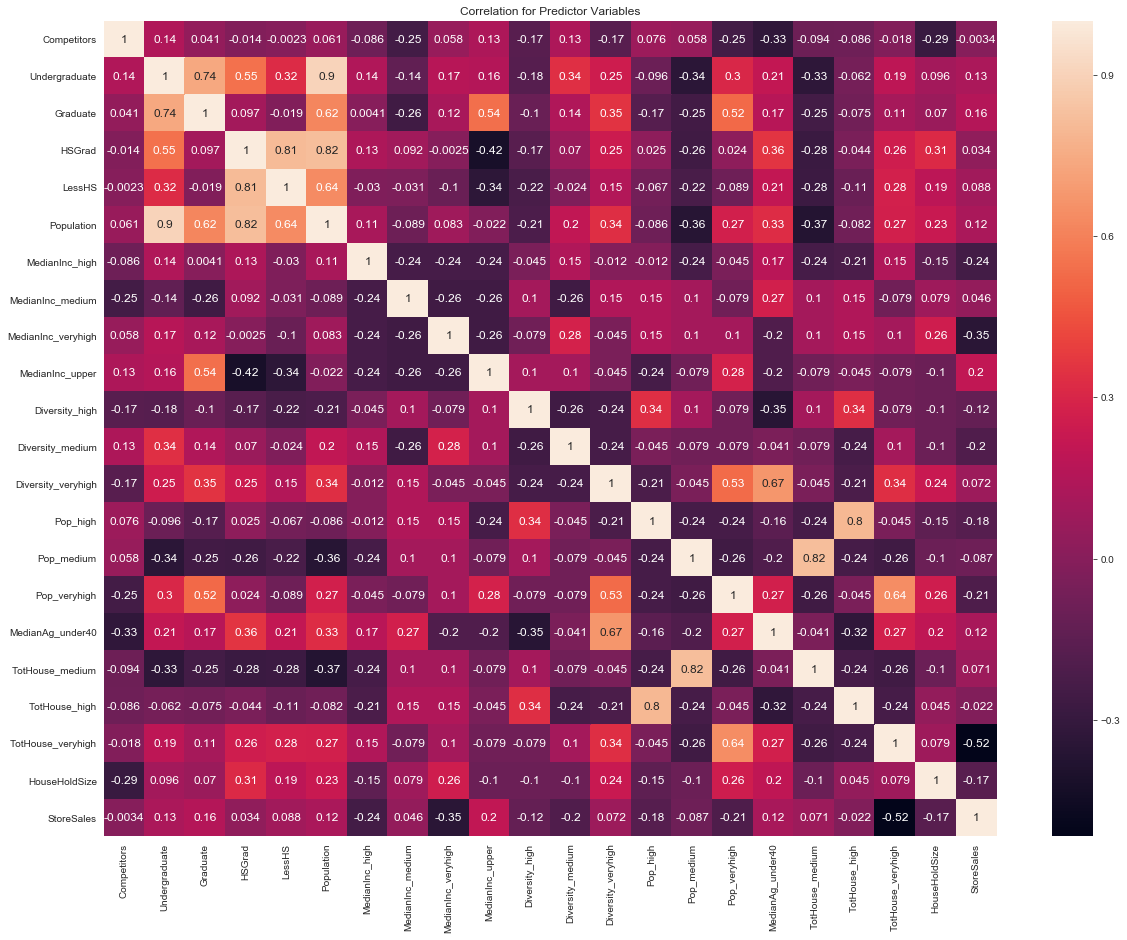

In [46]:
# Calculate correlations - Identify Correlated Predictor Variables
corr = df2num.corr()
# Heatmap

plt.figure(figsize = (20,15))
sns.heatmap(corr, annot=True, annot_kws={"size": 12})
plt.title("Correlation for Predictor Variables")

In [47]:
df2num_corr = df2num.corr()['StoreSales'][:-1] # -1 because StoreSales last column
golden_features_list = df2num_corr[abs(df2num_corr) > 0.1].sort_values(ascending=False)
print("There are {} strongly correlated values with StoreSales:\n{}".format(len(golden_features_list), golden_features_list))

There are 13 strongly correlated values with StoreSales:
MedianInc_upper       0.204748
Graduate              0.156957
Undergraduate         0.127091
Population            0.123400
MedianAg_under40      0.115236
Diversity_high       -0.121358
HouseHoldSize        -0.168707
Pop_high             -0.175088
Diversity_medium     -0.198943
Pop_veryhigh         -0.206781
MedianInc_high       -0.243962
MedianInc_veryhigh   -0.345068
TotHouse_veryhigh    -0.515485
Name: StoreSales, dtype: float64


# Visualize features

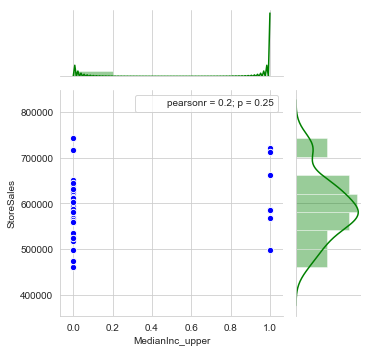

In [48]:
from scipy import stats
g = sns.JointGrid(x='MedianInc_upper', y='StoreSales', data=df2num, height=5, ratio=3)
g = g.plot_joint(plt.scatter, color="b", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=True, color="g")
g = g.annotate(stats.pearsonr)

In [ ]:
from scipy import stats
g = sns.JointGrid(x='MedianAg_above45', y='StoreSales', data=df2num, height=5, ratio=3)
g = g.plot_joint(plt.scatter, color="b", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=True, color="g")
g = g.annotate(stats.pearsonr)

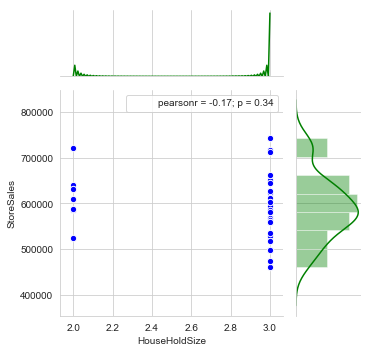

In [49]:
from scipy import stats
g = sns.JointGrid(x='HouseHoldSize', y='StoreSales', data=df2num, height=5, ratio=3)
g = g.plot_joint(plt.scatter, color="b", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=True, color="g")
g = g.annotate(stats.pearsonr)

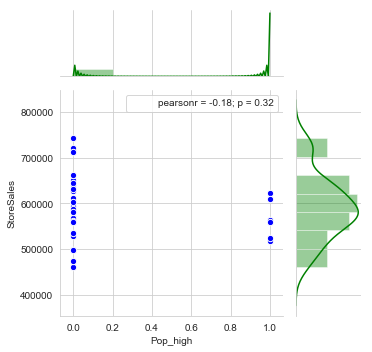

In [50]:
from scipy import stats
g = sns.JointGrid(x='Pop_high', y='StoreSales', data=df2num, height=5, ratio=3)
g = g.plot_joint(plt.scatter, color="b", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=True, color="g")
g = g.annotate(stats.pearsonr)

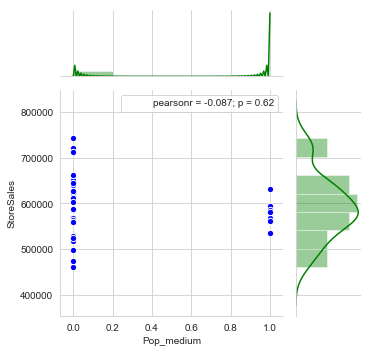

In [51]:
from scipy import stats
g = sns.JointGrid(x='Pop_medium', y='StoreSales', data=df2num, height=5, ratio=3)
g = g.plot_joint(plt.scatter, color="b", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=True, color="g")
g = g.annotate(stats.pearsonr)

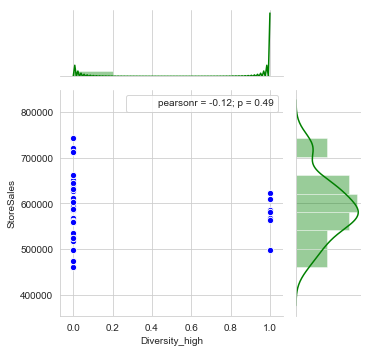

In [52]:
from scipy import stats
g = sns.JointGrid(x='Diversity_high', y='StoreSales', data=df2num, height=5, ratio=3)
g = g.plot_joint(plt.scatter, color="b", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=True, color="g")
g = g.annotate(stats.pearsonr)

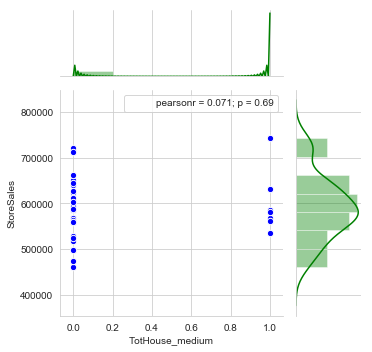

In [53]:
from scipy import stats
g = sns.JointGrid(x='TotHouse_medium', y='StoreSales', data=df2num, height=5, ratio=3)
g = g.plot_joint(plt.scatter, color="b", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=True, color="g")
g = g.annotate(stats.pearsonr)

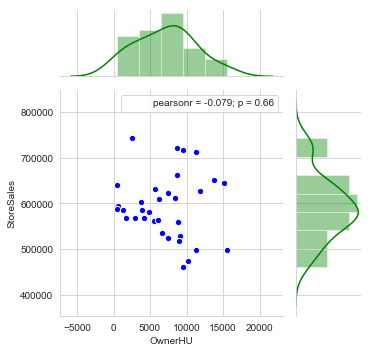

In [54]:
from scipy import stats
g = sns.JointGrid(x='OwnerHU', y='StoreSales', data=df1num, height=5, ratio=3)
g = g.plot_joint(plt.scatter, color="b", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=True, color="g")
g = g.annotate(stats.pearsonr)

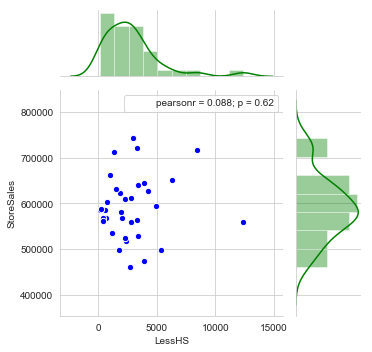

In [55]:
from scipy import stats
g = sns.JointGrid(x='LessHS', y='StoreSales', data=df1num, height=5, ratio=3)
g = g.plot_joint(plt.scatter, color="b", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=True, color="g")
g = g.annotate(stats.pearsonr)

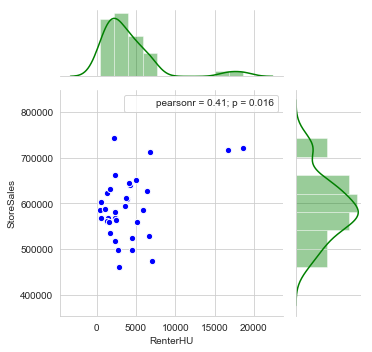

In [56]:
from scipy import stats
g = sns.JointGrid(x='RenterHU', y='StoreSales', data=df1num, height=5, ratio=3)
g = g.plot_joint(plt.scatter, color="b", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=True, color="g")
g = g.annotate(stats.pearsonr)

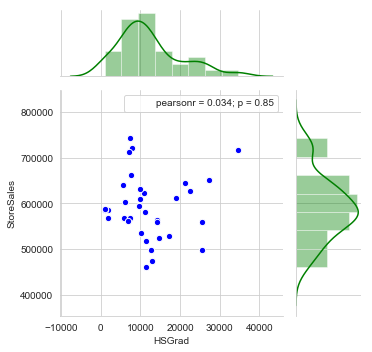

In [57]:
from scipy import stats
g = sns.JointGrid(x='HSGrad', y='StoreSales', data=df1num, height=5, ratio=3)
g = g.plot_joint(plt.scatter, color="b", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=True, color="g")
g = g.annotate(stats.pearsonr)

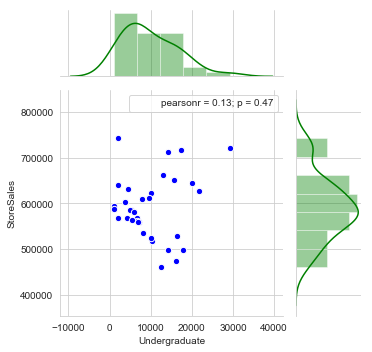

In [58]:
from scipy import stats
g = sns.JointGrid(x='Undergraduate', y='StoreSales', data=df1num, height=5, ratio=3)
g = g.plot_joint(plt.scatter, color="b", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=True, color="g")
g = g.annotate(stats.pearsonr)

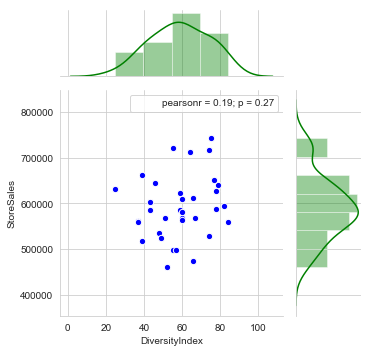

In [59]:
from scipy import stats
g = sns.JointGrid(x='DiversityIndex', y='StoreSales', data=df1num, height=5, ratio=3)
g = g.plot_joint(plt.scatter, color="b", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=True, color="g")
g = g.annotate(stats.pearsonr)

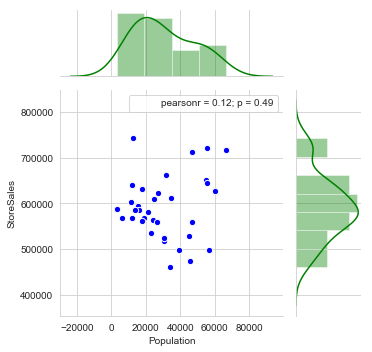

In [60]:
from scipy import stats
g = sns.JointGrid(x='Population', y='StoreSales', data=df1num, height=5, ratio=3)
g = g.plot_joint(plt.scatter, color="b", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=True, color="g")
g = g.annotate(stats.pearsonr)

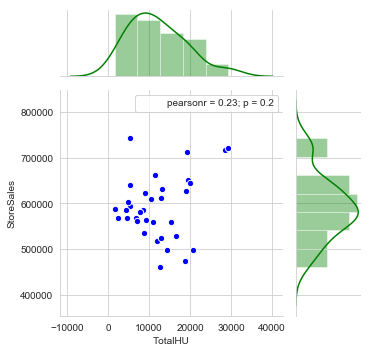

In [61]:
from scipy import stats
g = sns.JointGrid(x='TotalHU', y='StoreSales', data=df1num, height=5, ratio=3)
g = g.plot_joint(plt.scatter, color="b", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=True, color="g")
g = g.annotate(stats.pearsonr)

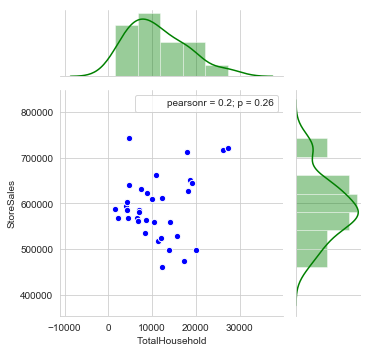

In [62]:
from scipy import stats
g = sns.JointGrid(x='TotalHousehold', y='StoreSales', data=df1num, height=5, ratio=3)
g = g.plot_joint(plt.scatter, color="b", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=True, color="g")
g = g.annotate(stats.pearsonr)

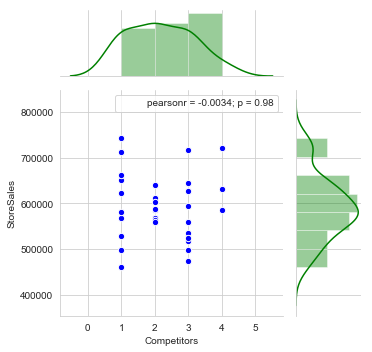

In [63]:
from scipy import stats
g = sns.JointGrid(x='Competitors', y='StoreSales', data=df1num, height=5, ratio=3)
g = g.plot_joint(plt.scatter, color="b", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=True, color="g")
g = g.annotate(stats.pearsonr)

In [64]:
df2num.head()

,Competitors,Undergraduate,Graduate,HSGrad,LessHS,Population,MedianInc_high,MedianInc_medium,MedianInc_veryhigh,MedianInc_upper,...,Diversity_veryhigh,Pop_high,Pop_medium,Pop_veryhigh,MedianAg_under40,TotHouse_medium,TotHouse_high,TotHouse_veryhigh,HouseHoldSize,StoreSales
0,2,1961,1058,5490,3363,11883,0,0,0,0,...,0,0,0,0,0,0,0,0,2,641068.222610
1,3,960,252,9600,4910,15737,0,0,0,0,...,0,0,1,0,0,0,0,0,3,593444.838546
2,1,15757,5785,27272,6281,55095,0,1,0,0,...,0,0,0,0,1,0,0,0,3,652391.301492
3,3,17415,5916,34697,8442,66469,0,0,0,0,...,1,0,0,0,1,0,0,0,3,718041.900365
4,2,5205,8428,1918,564,16114,0,0,0,1,...,0,0,1,0,0,1,0,0,2,586253.158030


In [65]:
# Create a Subset Dataframe - Matrix
df2num = df_merge.filter(['Competitors','Undergraduate',
                       'Graduate', 'HSGrad','LessHS', 'HouseHoldSize', 'Diversity_medium', 'Diversity_high',
                       'Diversity_veryhigh', 'Diversity_upper', 'MedianInc_medium', 'MedianInc_high',
                       'MedianInc_veryhigh', 'MedianInc_upper', 'Pop_medium', 'Pop_high', 'Pop_veryhigh',
                       'Pop_upper', 'MedianAg_under40', 'MedianAg_under42', 'MedianAg_above41',
                       'TotHouse_medium', 'TotHouse_high', 'TotHouse_veryhigh', 'TotHouse_upper',
                       'TotHunits_medium', 'TotHunits_high', 'TotHunits_veryhigh', 'TotHunits_upper',
                       'StoreSales'])


In [66]:
df2num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 30 columns):
Competitors           34 non-null int64
Undergraduate         34 non-null int64
Graduate              34 non-null int64
HSGrad                34 non-null int64
LessHS                34 non-null int64
HouseHoldSize         34 non-null int64
Diversity_medium      34 non-null uint8
Diversity_high        34 non-null uint8
Diversity_veryhigh    34 non-null uint8
Diversity_upper       34 non-null uint8
MedianInc_medium      34 non-null uint8
MedianInc_high        34 non-null uint8
MedianInc_veryhigh    34 non-null uint8
MedianInc_upper       34 non-null uint8
Pop_medium            34 non-null uint8
Pop_high              34 non-null uint8
Pop_veryhigh          34 non-null uint8
Pop_upper             34 non-null uint8
MedianAg_under40      34 non-null uint8
MedianAg_under42      34 non-null uint8
MedianAg_above41      34 non-null uint8
TotHouse_medium       34 non-null uint8
TotHouse_high    

In [67]:
# Create Dataframe of Features for  variable X
X = df2num.drop('StoreSales', axis = 1)

# Create Dataframe of Target for variable y
y = df2num['StoreSales']

In [68]:
# Create the linear Regression Model
from sklearn.linear_model import LinearRegression
lr_mod=LinearRegression()
lr_mod.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
# Linear Regression - Summary Report
import statsmodels.api as sm
X_1 = sm.add_constant(X)
model = sm.OLS(y, X_1)
lr_stats = model.fit()

print(lr_stats.summary())

                            OLS Regression Results                            
Dep. Variable:             StoreSales   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     1.530
Date:                Fri, 08 Nov 2019   Prob (F-statistic):              0.292
Time:                        22:04:31   Log-Likelihood:                -394.66
No. Observations:                  34   AIC:                             843.3
Df Residuals:                       7   BIC:                             884.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               7.782e+05    1.5

In [70]:
# Create a Subset Dataframe - Matrix
df3num = df2num.filter(['Competitors','HouseHoldSize',
                       'Diversity_veryhigh', 'Diversity_upper',
                       'MedianInc_veryhigh', 'MedianInc_upper', 'Pop_medium', 'Pop_veryhigh',
                       'MedianAg_under42', 'TotHouse_medium', 'TotHouse_high', 'TotHouse_upper',
                       'StoreSales'])

In [71]:
df3num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 13 columns):
Competitors           34 non-null int64
HouseHoldSize         34 non-null int64
Diversity_veryhigh    34 non-null uint8
Diversity_upper       34 non-null uint8
MedianInc_veryhigh    34 non-null uint8
MedianInc_upper       34 non-null uint8
Pop_medium            34 non-null uint8
Pop_veryhigh          34 non-null uint8
MedianAg_under42      34 non-null uint8
TotHouse_medium       34 non-null uint8
TotHouse_high         34 non-null uint8
TotHouse_upper        34 non-null uint8
StoreSales            34 non-null float64
dtypes: float64(1), int64(2), uint8(10)
memory usage: 1.4 KB


In [72]:
# Create Dataframe of Features for  variable X
X = df3num.drop('StoreSales', axis = 1)

# Create Dataframe of Target for variable y
y = df3num['StoreSales']

In [73]:
# Create the linear Regression Model
from sklearn.linear_model import LinearRegression
lr_mod1=LinearRegression()
lr_mod1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
# Linear Regression - Summary Report
import statsmodels.api as sm
X_1 = sm.add_constant(X)
model = sm.OLS(y, X_1)
lr_stats = model.fit()

print(lr_stats.summary())

                            OLS Regression Results                            
Dep. Variable:             StoreSales   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     2.402
Date:                Fri, 08 Nov 2019   Prob (F-statistic):             0.0380
Time:                        22:04:55   Log-Likelihood:                -412.26
No. Observations:                  34   AIC:                             850.5
Df Residuals:                      21   BIC:                             870.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.815e+05   9.47

In [75]:
# Create a Subset Dataframe - Matrix
df3num = df2num.filter(['Competitors','HouseHoldSize',
                       'Diversity_veryhigh', 'Diversity_upper',
                       'MedianInc_veryhigh', 'MedianInc_upper', 'Pop_medium', 'Pop_veryhigh',
                       'MedianAg_under42', 'TotHouse_medium', 'TotHouse_high', 'TotHouse_upper',
                       'TotHunits_veryhigh', 'TotHunits_upper',
                       'StoreSales'])

In [76]:
# Create a Subset Dataframe - Matrix

# remove 'TotHunits_veryhigh', 'TotHunits_upper', based ib VIF score multicollinearity
#                        'Pop_medium', 'Pop_veryhigh', 'Competitors'


df3num = df2num.filter(['HouseHoldSize',
                       'Diversity_veryhigh', 'Diversity_upper',
                       'MedianInc_veryhigh', 'MedianInc_upper',
                       'MedianAg_under42', 'TotHouse_medium', 'TotHouse_high', 'TotHouse_upper',
                       'StoreSales'])

In [77]:
# Create Dataframe of Features for  variable X
X = df3num.drop('StoreSales', axis = 1)

# Create Dataframe of Target for variable y
y = df3num['StoreSales']

In [78]:
# Create Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [79]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             StoreSales   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     120.5
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           2.52e-18
Time:                        22:05:31   Log-Likelihood:                -435.89
No. Observations:                  34   AIC:                             889.8
Df Residuals:                      25   BIC:                             903.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
HouseHoldSize       1.773e+05   1.53e+04     11.618      0.000    1.46e+05    2.09e+05
Diversity_veryhigh  1.613e+04   5.42e+04      0.297      0.769   -9.56e+04    1.28e+05
Diversity_upper     1.054e+05   5.43e+04      1.943      0.063   -6329.807    2.17e+05
MedianInc_veryhigh -6.629e+04    5.2e+04     -1.275      0.214   -1.73e+05    4.08e+04
MedianInc_upper     9.709e+04   5.25e+04      1.850      0.076    -1.1e+04    2.05e+05
MedianAg_under42   -7.008e+04    7.8e+04     -0.899      0.377   -2.31e+05    9.05e+04
TotHouse_medium     1.078e+05   4.87e+04      2.214      0.036    7526.059    2.08e+05
TotHouse_high       1.155e+05   5.84e+04      1.976      0.059   -4863.990    2.36e+05
TotHouse_upper      9.418e+04   4.93e+04      1.910      0.068   -7353.437    1.96e+05
==============================================================================
Omnibus:                        2.403   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                2.005
Skew:                           0.468   Prob(JB):                        0.367
Kurtosis:                       2.266   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VIF - Variance Inflation Factor¶

In [89]:
# Create a Subset Dataframe - Matrix
df3num = df2num.filter(['Competitors','HouseHoldSize',
                       'Diversity_veryhigh', 'Diversity_upper',
                       'MedianInc_veryhigh', 'MedianInc_upper', 'Pop_medium', 'Pop_veryhigh',
                       'MedianAg_under42', 'TotHouse_medium', 'TotHouse_high', 'TotHouse_upper',
                       'TotHunits_veryhigh', 'TotHunits_upper',
                       'StoreSales'])

In [85]:
# Create a Subset Dataframe - Matrix

# remove 'TotHunits_veryhigh', 'TotHunits_upper', based ib VIF score multicollinearity
#                        'Pop_medium', 'Pop_veryhigh', 'Competitors'


df3num = df2num.filter(['HouseHoldSize',
                       'Diversity_veryhigh', 'Diversity_upper',
                       'MedianInc_veryhigh', 'MedianInc_upper',
                       'MedianAg_under42', 'TotHouse_medium', 'TotHouse_high', 'TotHouse_upper',
                       'StoreSales'])

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices, build_design_matrices
from patsy import dmatrices, dmatrix

In [91]:
outcome, predictors = dmatrices("StoreSales ~ Competitors +HouseHoldSize +Diversity_veryhigh +Diversity_upper +MedianInc_veryhigh +MedianInc_upper +Pop_medium +Pop_veryhigh +MedianAg_under42 +TotHouse_medium +TotHouse_high +TotHouse_upper +TotHunits_veryhigh +TotHunits_upper",
                                df3num, return_type='dataframe')

In [92]:
outcome, predictors = dmatrices("StoreSales ~ Competitors +HouseHoldSize +Diversity_veryhigh +Diversity_upper +MedianInc_veryhigh +MedianInc_upper +Pop_medium +Pop_veryhigh +MedianAg_under42 +TotHouse_medium +TotHouse_high",
                                df3num, return_type='dataframe')

In [93]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns

In [94]:
vif.round(1)

,VIF Factor,features
0,94.4,Intercept
1,1.5,Competitors
2,1.4,HouseHoldSize
3,1.9,Diversity_veryhigh
4,1.6,Diversity_upper
5,1.6,MedianInc_veryhigh
6,1.7,MedianInc_upper
7,3.3,Pop_medium
8,2.2,Pop_veryhigh
9,1.7,MedianAg_under42


In [ ]:
lr_mod

In [ ]:
# Visualize Important Features
plt.figure(figsize=(10, 7))
imp_features_lr_mod = pd.Series(lr_mod.coef_, index=X.columns)
imp_features_lr_mod.plot(kind='barh')
plt.title("Linear Regression - Important Features - Coefficients")

In [ ]:
# Visualize Important Features
plt.figure(figsize=(10, 7))
imp_features_lr_mod1 = pd.Series(lr_mod1.coef_, index=X.columns)
imp_features_lr_mod1.plot(kind='barh')
plt.title("Linear Regression - Important Features - Coefficients")